In [1]:
import tensorflow as tf
import numpy as np
import json
import os
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import glob
# import tensorflow.compat.v1 as tf


C:\Users\Playdata\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Playdata\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Playdata\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Playdata\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\f

#### 이미지 확인

(1080, 1920)


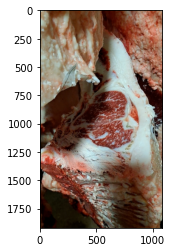

In [3]:
# 본인 이미지 경로에 맞춰 확인! 
img_1 = Image.open("C:/Users/Playdata/Desktop/FinalProject/test/dataset/QC_IMAGE/Training/Image_2/QC_cow_segmentation_2_000375.jpg")

plt.imshow(img_1)
print(img_1.size) 
# 1은 이미지 size가 (1080, 1920)로 맞춰진 것 같은데...?
# (2268, 4032)도 존재...

In [25]:
print(img_1.size)

(1080, 1920)


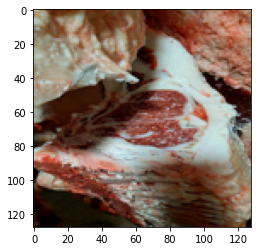

In [5]:
plt.imshow(img_1.resize([128,128]))

In [11]:
data = img_1.convert("RGB")

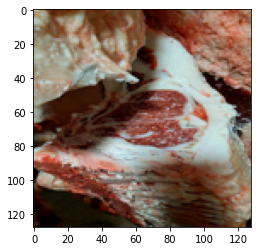

In [12]:
data = data.resize([128,128])
plt.imshow(data)

In [13]:
data = np.asarray(data)

In [14]:
print(data.shape)
print(data)

(128, 128, 3)
[[[192 209 197]
  [189 201 190]
  [182 186 166]
  ...
  [172 150 128]
  [168 155 141]
  [166 158 152]]

 [[180 174 152]
  [175 148 118]
  [179 157 123]
  ...
  [186 151 121]
  [177 130  99]
  [172 128 110]]

 [[173 146 112]
  [175 144 109]
  [175 153 118]
  ...
  [173 131 104]
  [173 116  84]
  [169 106  78]]

 ...

 [[ 52  20   3]
  [ 58  25   9]
  [ 62  29  18]
  ...
  [ 15  12   7]
  [  0   0   0]
  [  2   1   0]]

 [[ 58  24   4]
  [ 62  25   9]
  [ 59  26  14]
  ...
  [  9   6   3]
  [  0   0   0]
  [  1   1   0]]

 [[ 55  25   4]
  [ 51  19   3]
  [ 24   5   1]
  ...
  [ 13  10   7]
  [  0   0   0]
  [  1   1   0]]]


In [15]:
data.reshape([1,128,128,3])
print(data.shape)

(128, 128, 3)


#### 경로 설정

In [61]:
train_data_dir = "C:/Users/Playdata/Desktop/FinalProject/test/dataset/QC_IMAGE/Training"
test_data_dir = "C:/Users/Playdata/Desktop/FinalProject/test/dataset/QC_IMAGE/Validation"
categories = ['1++','1+','1','2','3']
nb_class=len(categories) # 5

In [2]:
# 이미지 사이즈 지정
image_w = 128
image_h = 128

pixels = image_w * image_h * 3

#### 데이터 불러오기 

In [ ]:
# train 데이터 불러오기

x_train = []
y_train = []
count_train = [0, 0, 0, 0, 0]

# 폴더안에 있는 데이터 다 가져오기
# enumerate() : 리스트의 순서와 값 반환
for idx, c in enumerate(categories):
#     print(idx, c)
    label = [0 for i in range(nb_class)]
#     print(label)
    label[idx] = 1
#     print(label)

    image_dir = train_data_dir+"/Image_"+c
#     print(image_dir)
    files = glob.glob(image_dir+"/*.jpg")
    print(len(files))
    count_train.append(len(files))
#     print(files)

    # 파일안에 있는 이미지 오픈해서 어레이값으로 변경

    for i, f in enumerate(files):
#         print(i)
        count_train[idx] += 1
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w,image_h))
        data = np.asarray(img)
        x_train.append(data)
        y_train.append(label)
        
# print(count_train)

In [63]:
# test 데이터 불러오기

x_test = []
y_test = []
count_test = [0, 0, 0, 0, 0]

for idx, c in enumerate(categories):
    label = [0 for i in range(nb_class)]
    label[idx] = 1
    
    image_dir = test_data_dir+"/Image_"+c
    files = glob.glob(image_dir+"/*.jpg")

    count_test.append(len(files))

    for i, f in enumerate(files):
        print(i)
        count_test[idx] += 1
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w,image_h))
        data = np.asarray(img)
        x_test.append(data)
        y_test.append(label)
        
print(count_test)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


1245
1246
1247
1248
1249
1250
1251
1252
1253
1254
1255
1256
1257
1258
1259
1260
1261
1262
1263
1264
1265
1266
1267
1268
1269
1270
1271
1272
1273
1274
1275
1276
1277
1278
1279
1280
1281
1282
1283
1284
1285
1286
1287
1288
1289
1290
1291
1292
1293
1294
1295
1296
1297
1298
1299
1300
1301
1302
1303
1304
1305
1306
1307
1308
1309
1310
1311
1312
1313
1314
1315
1316
1317
1318
1319
1320
1321
1322
1323
1324
1325
1326
1327
1328
1329
1330
1331
1332
1333
1334
1335
1336
1337
1338
1339
1340
1341
1342
1343
1344
1345
1346
1347
1348
1349
1350
1351
1352
1353
1354
1355
1356
1357
1358
1359
1360
1361
1362
1363
1364
1365
1366
1367
1368
1369
1370
1371
1372
1373
1374
1375
1376
1377
1378
1379
1380
1381
1382
1383
1384
1385
1386
1387
1388
1389
1390
1391
1392
1393
1394
1395
1396
1397
1398
1399
1400
1401
1402
1403
1404
1405
1406
1407
1408
1409
1410
1411
1412
1413
1414
1415
1416
1417
1418
1419
1420
1421
1422
1423
1424
1425
1426
1427
1428
1429
1430
1431
1432
1433
1434
1435
1436
1437
1438
1439
1440
1441
1442
1443
1444


799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1

451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700


In [57]:
print(len(x_train))
print(x_train[0].shape)
print(len(y_train))
print(y_train[0])
print(x_train[0])

69434
(128, 128, 3)
69434
[1 0 0 0 0]
[[[161 148 134]
  [157 143 126]
  [152 144 126]
  ...
  [131  47  52]
  [131  39  43]
  [124  32  34]]

 [[154 140 123]
  [153 143 126]
  [160 157 145]
  ...
  [136  52  59]
  [130  37  39]
  [125  32  33]]

 [[156 144 127]
  [161 154 139]
  [166 162 146]
  ...
  [127  31  31]
  [115  19  17]
  [121  29  31]]

 ...

 [[169 165 145]
  [165 163 142]
  [163 160 139]
  ...
  [ 73  35  15]
  [ 67  38  22]
  [ 25   8   1]]

 [[185 187 167]
  [182 184 163]
  [175 172 152]
  ...
  [ 72  35  19]
  [ 65  37  22]
  [ 52  29  16]]

 [[174 167 147]
  [175 171 151]
  [171 160 138]
  ...
  [ 78  43  29]
  [ 83  54  40]
  [ 74  47  32]]]


In [69]:
print(len(x_test))
print(len(y_test))

8679
8679


AttributeError: 'list' object has no attribute 'shape'

In [71]:
# 데이터 ndarray 타입으로 변환
x_train = np.array(x_train)
y_train = np.array(y_train)
print(x_train.shape)
print(y_train.shape)

x_test = np.array(x_test)
y_test = np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(8679, 128, 128, 3)
(8679, 5)


#### 저장

In [ ]:
np.save("C:/Users/Playdata/Desktop/FinalProject/test/dataset/trainX.npy",x_train)
np.save("C:/Users/Playdata/Desktop/FinalProject/test/dataset/trainY.npy",y_train)

In [72]:
np.save("C:/Users/Playdata/Desktop/FinalProject/test/dataset/testX.npy",x_test)
np.save("C:/Users/Playdata/Desktop/FinalProject/test/dataset/testY.npy",y_test)

In [3]:
train_x = np.load("C:/Users/Playdata/Desktop/FinalProject/test/dataset/trainX.npy")
train_y = np.load("C:/Users/Playdata/Desktop/FinalProject/test/dataset/trainY.npy")

In [4]:
test_x = np.load("C:/Users/Playdata/Desktop/FinalProject/test/dataset/testX.npy")
test_y = np.load("C:/Users/Playdata/Desktop/FinalProject/test/dataset/testY.npy")

In [66]:
print(type(train_x))
print(type(train_y))
print(train_x.shape)
print(train_y.shape)
print(train_x[0])

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(69434, 128, 128, 3)
(69434, 5)
[[[161 148 134]
  [157 143 126]
  [152 144 126]
  ...
  [131  47  52]
  [131  39  43]
  [124  32  34]]

 [[154 140 123]
  [153 143 126]
  [160 157 145]
  ...
  [136  52  59]
  [130  37  39]
  [125  32  33]]

 [[156 144 127]
  [161 154 139]
  [166 162 146]
  ...
  [127  31  31]
  [115  19  17]
  [121  29  31]]

 ...

 [[169 165 145]
  [165 163 142]
  [163 160 139]
  ...
  [ 73  35  15]
  [ 67  38  22]
  [ 25   8   1]]

 [[185 187 167]
  [182 184 163]
  [175 172 152]
  ...
  [ 72  35  19]
  [ 65  37  22]
  [ 52  29  16]]

 [[174 167 147]
  [175 171 151]
  [171 160 138]
  ...
  [ 78  43  29]
  [ 83  54  40]
  [ 74  47  32]]]


In [67]:
print(train_x.shape)
print(train_y.shape)
print(train_x[0])

(69434, 128, 128, 3)
(69434, 5)
[[[161 148 134]
  [157 143 126]
  [152 144 126]
  ...
  [131  47  52]
  [131  39  43]
  [124  32  34]]

 [[154 140 123]
  [153 143 126]
  [160 157 145]
  ...
  [136  52  59]
  [130  37  39]
  [125  32  33]]

 [[156 144 127]
  [161 154 139]
  [166 162 146]
  ...
  [127  31  31]
  [115  19  17]
  [121  29  31]]

 ...

 [[169 165 145]
  [165 163 142]
  [163 160 139]
  ...
  [ 73  35  15]
  [ 67  38  22]
  [ 25   8   1]]

 [[185 187 167]
  [182 184 163]
  [175 172 152]
  ...
  [ 72  35  19]
  [ 65  37  22]
  [ 52  29  16]]

 [[174 167 147]
  [175 171 151]
  [171 160 138]
  ...
  [ 78  43  29]
  [ 83  54  40]
  [ 74  47  32]]]


In [74]:
print(type(test_x))
print(type(test_y))
print(test_x.shape)
print(test_y.shape)
print(test_x[0])

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(8679, 128, 128, 3)
(8679, 5)
[[[ 88  26   7]
  [ 89  28   8]
  [ 90  30  12]
  ...
  [135 100  76]
  [142 104  83]
  [147 110  91]]

 [[ 85  24   9]
  [ 84  27  15]
  [ 84  30  18]
  ...
  [139 112  90]
  [150 126 108]
  [145 118 101]]

 [[ 78  27  14]
  [ 77  27  17]
  [ 77  29  20]
  ...
  [143 126 108]
  [143 125 108]
  [142 120 100]]

 ...

 [[ 74  21  14]
  [ 77  24  17]
  [ 73  20  15]
  ...
  [117 115  96]
  [118 117  99]
  [119 117 101]]

 [[ 83  32  25]
  [ 78  27  20]
  [ 78  28  21]
  ...
  [120 116  96]
  [119 114  94]
  [121 117  97]]

 [[ 70  23  18]
  [ 75  27  23]
  [ 68  22  20]
  ...
  [116 110  89]
  [120 107  84]
  [120 105  83]]]


In [5]:
# 표준화, 정규화
train_x =  train_x.astype('float32')/255

test_x =  test_x.astype('float32')/255

#### CNN 설계

In [6]:
# hyper-parameter 설정

learning_rate = 0.0001
training_epochs = 100
batch_size = 100

In [22]:
# CNN network 설계
tf.reset_default_graph()
X = tf.placeholder(tf.float32, [None,128, 128, 3])
#X_img = tf.placeholder(tf.float32, [None, 128*128*3]) #??X128X128X3 자동 셋팅
Y = tf.placeholder(tf.float32, [None, 5]) # 몇 개의 데이터가 들어올지 모르기 때문에 None으로 설정
dropout = tf.placeholder(tf.float32) # Convolution Layer에 적용될 dropout
dropout2 = tf.placeholder(tf.float32) # Fully-connected Layer에 적용될 dropout

##########################test###############################
# convolution layer1
W1 = tf.Variable(tf.random_normal([3,3,3,32])) # filter 설정
B1 = tf.Variable(tf.random_normal([32]))
L1 = tf.nn.conv2d(X,W1,strides=[1,1,1,1],padding='SAME') + B1
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize = [1, 2, 2, 1], strides=[1, 2, 2, 1], padding = 'SAME')
L1 = tf.nn.dropout(L1, dropout)

# convolution layer2
W2 = tf.Variable(tf.random_normal([3,3,32,64]))
B2 = tf.Variable(tf.random_normal([64]))
L2 = tf.nn.conv2d(L1,W2,strides=[1,1,1,1],padding='SAME') + B2
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize = [1, 2, 2, 1], strides=[1, 2, 2, 1], padding = 'SAME')
L2 = tf.nn.dropout(L2, dropout)

# convolution layer3
W3 = tf.Variable(tf.random_normal([3,3,64,128]))
B3 = tf.Variable(tf.random_normal([128]))
L3 = tf.nn.conv2d(L2,W3,strides=[1,1,1,1],padding='SAME') + B3
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize = [1, 2, 2, 1], strides=[1, 2, 2, 1], padding = 'SAME')
L3 = tf.nn.dropout(L3, dropout)

# convolution layer4
W4 = tf.Variable(tf.random_normal([3,3,128,256]))
B4 = tf.Variable(tf.random_normal([256]))
L4 = tf.nn.conv2d(L3,W4,strides=[1,1,1,1],padding='SAME') + B4
L4 = tf.nn.relu(L4)
L4 = tf.nn.max_pool(L4, ksize = [1, 2, 2, 1], strides=[1, 2, 2, 1], padding = 'SAME')
L4 = tf.nn.dropout(L4, dropout)
L4 = tf.reshape(L4, [-1, 8*8*256])

# Fully_connected layer
FCW= tf.get_variable("FCW", shape=[8*8*256, 624], initializer = tf.contrib.layers.xavier_initializer())
FCB = tf.Variable(tf.random_normal([624]))
y = tf.matmul(L4, FCW) + FCB
y = tf.nn.relu(y)
y = tf.nn.dropout(y, dropout2)

#출력
FCWO = tf.get_variable("FCWO", shape=[624,5], initializer = tf.contrib.layers.xavier_initializer())
model =  tf.matmul(y, FCWO)
hypothesis = tf.nn.softmax(model)


In [23]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model,labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

In [29]:
# 세션 열고 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())


for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(len(train_x)/batch_size)
    print(epoch+1, "번째")
    for i in range(total_batch):
        # print(i)
        batch_xs = train_x[batch_size*i : batch_size*(i+1)]
        #print(len(batch_xs))
        #print(batch_xs.shape)
        batch_ys = train_y[batch_size*i : batch_size*(i+1)]
        #print(len(batch_ys))
        #print(batch_ys.shape)
        _, cost_val= sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys, dropout : 0.5, dropout2 : 0.25})
        avg_cost += cost_val
    print(cost_val)
# 정확도 계산
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

1 번째
6241.6387
2 번째
1.6094378
3 번째
1.6094378
4 번째
1.6094378
5 번째
1.6094378
6 번째
1.6094378
7 번째
1.6094378
8 번째
1.6094378
9 번째


KeyboardInterrupt: 

In [ ]:
# 테스트 데이터 정확도 계산

print('Accuracy:',sess.run(accuracy,feed_dict={X: test_x, Y:test_y, dropout : 1.0, dropout2 : 1.0}))
